### [淺度機器學習HW1](https://ntpuccw.blog/python-in-learning/sml-lesson-5-主成分分析的原理與實驗/) ###

### 載入相關套件 ###

In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from matplotlib.ticker import PercentFormatter
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
import plotly.express as px

### 匯入資料ㄧ(wine.xlsx) ###

In [2]:
data = pd.read_excel('/Users/liang/Documents/淺度機器學習/資料集/wine.xlsx')#data為dataframe
datanp = np.array(data)
variables = data.columns
variables
data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### 1.繪製變數間的相關係數圖，以觀察變數間是否存在相關性，參考如圖一（或其他類似的圖）。  ###

<AxesSubplot:>

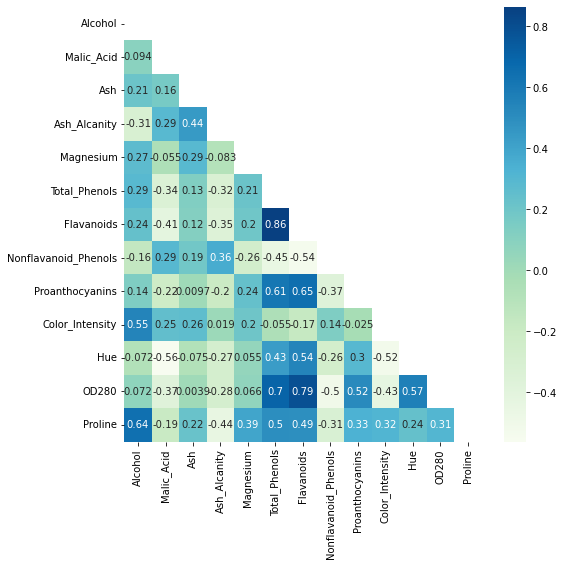

In [3]:
df = pd.DataFrame(datanp[:, 0:13], columns=variables[0:13])
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool))  # diagonal mask
fig, ax = plt.subplots(figsize=(8, 8))
seaborn.heatmap(R, annot=True, mask=mask, cmap='GnBu')
# vlag


##### \<sol\> 由上圖相關係數矩陣可觀測出變數Flavanoids與變數Total_Phenols兩者間的相關係數高達0.86，OD280與Flavanoids間的相關係數為0.79，都說明具有高度相關。 ######

### 2.繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考，參考如圖二上排。 ###

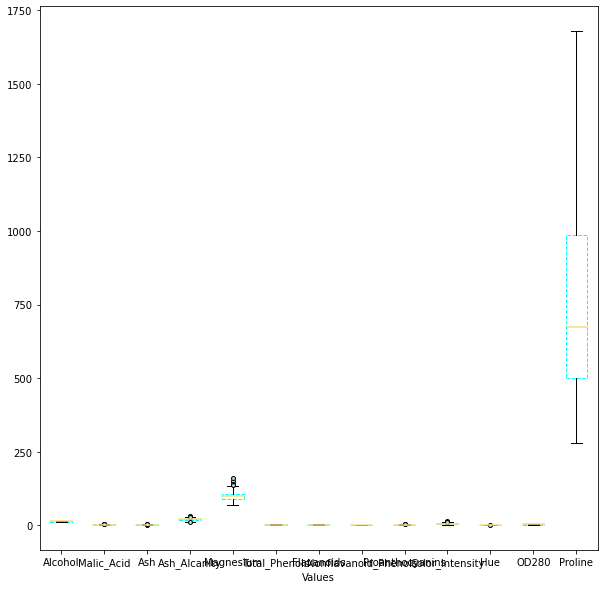

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
boxprops = dict(linestyle='--', linewidth=1, color='#00FFFF')#darkgoldenrod
medianprops = dict(linestyle='-', linewidth=1.5, color='#FBDD7E')
flierprops = dict(marker='o', markerfacecolor='#ADD8E6',
                  markersize=4, linestyle='none')
ax.boxplot(datanp[:, 0:13], boxprops=boxprops,
           flierprops=flierprops, labels=variables[0:13],medianprops=medianprops, vert=True)
ax.set_xlabel('Values')
plt.show()


##### \<sol\> 由上圖Boxplot可觀測出，變數Proline與其他變數的單位差距很大，故此筆資料建議做標準化。 #####

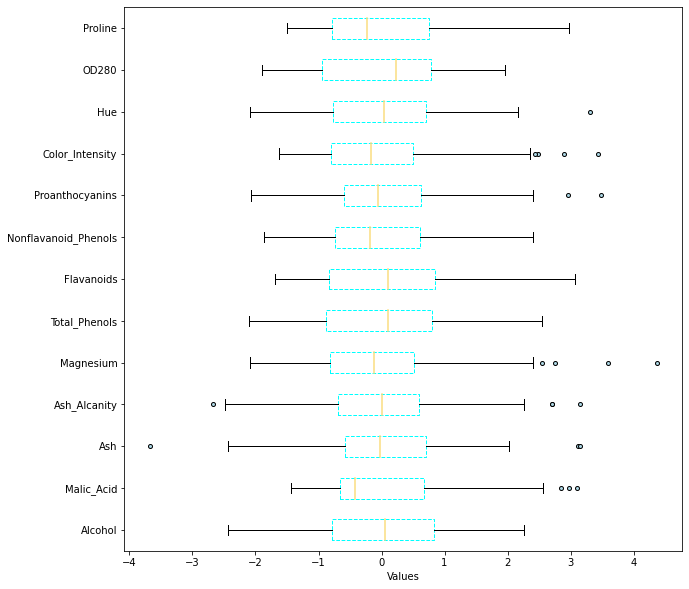

In [5]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(datanp)
# Apply transform to dataset.
ratings_ = scaler.transform(datanp)

fig, ax = plt.subplots(figsize=(10, 10))
boxprops = dict(linestyle='--', linewidth=1, color='#00FFFF')
medianprops = dict(linestyle='-', linewidth=1.5, color='#FBDD7E')
flierprops = dict(marker='o', markerfacecolor='#ADD8E6',
                  markersize=4, linestyle='none')
ax.boxplot(ratings_[:, 0:13], boxprops=boxprops,
           flierprops=flierprops, labels=variables[0:13], medianprops=medianprops,vert=False)
ax.set_xlabel('Values')
plt.show()


##### \<sol\> 此圖為標準化完的結果，可觀測出每個變數的離散程度相近。 #####

### 3.進行主成分分析，繪製特徵值由大而小的分布與 scree plot。參考如圖二中排。 ###

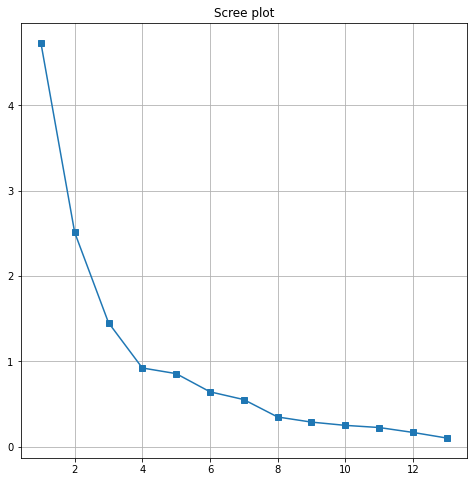

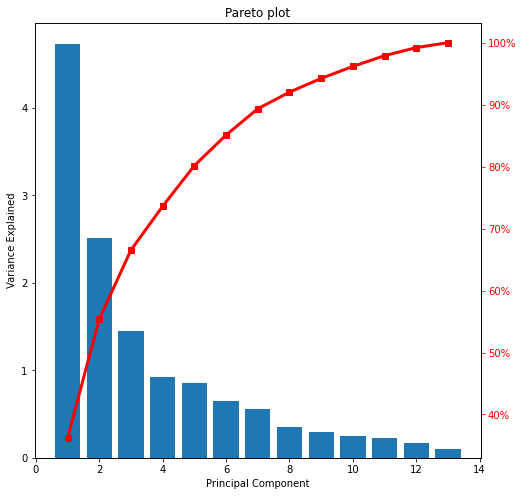

In [6]:
s_x_npfun = np.cov(ratings_[:, 0:13].T, bias=False)
w, v = eig(s_x_npfun)
idx = np.argsort(w)[::-1]#[::-1] ：代表顺序相反操作
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T


plt.figure(figsize=(8, 8))
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker='s')
plt.title('Scree plot')
plt.grid(True)
plt.show()
fig, ax = plt.subplots(figsize=(8, 8))
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax2 = ax.twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100,
         marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
ax.set_title('Pareto plot')
plt.show()


##### \<sol\> 由scree plot 中可觀測，在第四個主成分時有個明顯的彎曲點(elbow)，表示前面四個主成分已經足夠表達原變數的變異含量，則建議新變數取四個主成分即可;而從pareto plot 近一步可觀測出，當選取四個主成分時，這四個主成分已經達到原變數的變異含量的70\%以上，故只取四個主成分可達到維度的縮減(dimension reduction)。 ######

### 4.資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。如圖二下排左。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。 ###

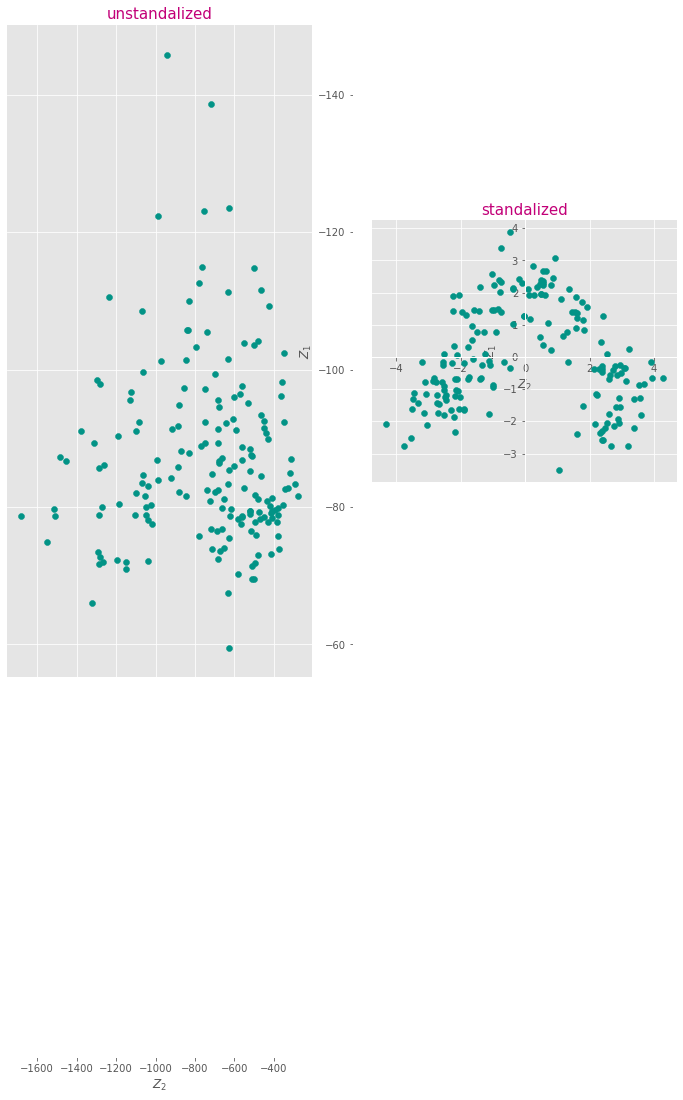

In [7]:
# 未標準化的
Sx = np.cov(datanp[:, 0:13].T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]  # 這個要問
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ datanp[:, 0:13].T
plt.style.use('ggplot')#調整画布风格
fig, ax = plt.subplots(1, 2, figsize=(12, 12), squeeze=False)
ax[0][0].scatter(Z[0, :], Z[1, :],c='#029386')
# ax[0][0].set_aspect(1)
# ax[0][0].set_xlim([-5,5])
# ax[0][0].set_ylim([-100,-105])

ax[0][0].set_ylabel('$Z_1$')
ax[0][0].set_xlabel('$Z_2$')
ax[0][0].set_title('unstandalized',  c='#C20078',size=15)
ax[0][0].spines['left'].set_position(('data', 0))
ax[0][0].spines['bottom'].set_position(('data', 0))
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)  # 可觀察出z1的能量大於z2
ax[0][0].invert_yaxis()

# 標準化的
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(datanp)
# Apply transform to dataset.
ratings_ = scaler.transform(datanp)
Sx = np.cov(ratings_[:, 0:13].T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]  # 這個要問
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings_[:, 0:13].T
ax[0][1].scatter(Z[0, :], Z[1, :],c='#029386')
ax[0][1].set_aspect(1)
ax[0][1].set_aspect(1)
ax[0][1].set_title('standalized', c='#C20078',size=15)
ax[0][1].set_ylabel('$Z_1$')
ax[0][1].set_xlabel('$Z_2$')
ax[0][1].spines['left'].set_position(('data', 0))
ax[0][1].spines['bottom'].set_position(('data', 0))
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)  # 可觀察出z1的能量大於z2
# ax[0][1].invert_yaxis()
plt.show()


##### 

##### \<sol\> 左圖為尚未經過標準化的前兩項主成分的離散圖，右圖則為經過標準化的，可看出還沒經過標準化時離散程度非常大，而經過標準化後的離散圖相較未標準化的可比較清楚看出酒莊分為三個群組，大致為左邊一群、上方一群、右邊一群。 #####

### 5.再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色，如圖二下排右。 ###

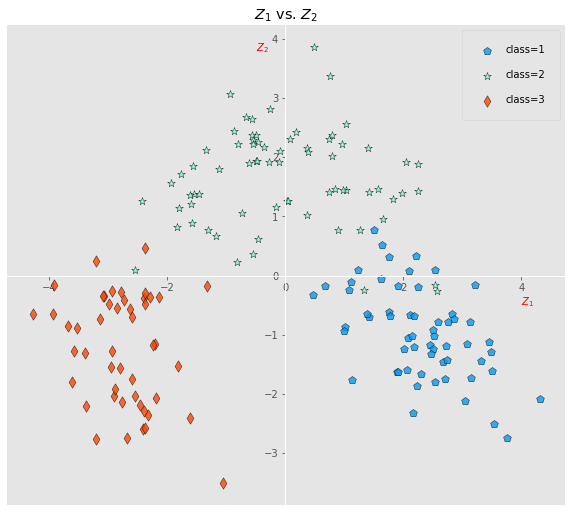

In [8]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(datanp)
# Apply transform to dataset.
ratings_ = scaler.transform(datanp)
Sx = np.cov(ratings_[:, 0:13].T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]  # 這個要問
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings_[:, 0:13].T
# 用ratings_[:,0:13]来训练PCA模型，同时返回降维后的数据
pca_fit = PCA().fit_transform(ratings_[:, 0:13])
fig, ax = plt.subplots(1, figsize=(10, 10), squeeze=False)
colors = ['#069AF3', '#7FFFD4', '#FF4500']
labels = data.iloc[:, -1].unique()
markers = ['p', '*', 'd']
for i, label in enumerate(labels):
    mask = data.iloc[:, -1] == label  # 這裡畫圖用到條件式的判斷，比如下面的條件式判斷範例
    ax[0][0].scatter(pca_fit[mask, 0], pca_fit[mask, 1], c=colors[i], label="class={}".format(
        i+1), alpha=0.8, edgecolors='black', marker=markers[i], s=65)
    ax[0][0].set_aspect(1)
    ax[0][0].spines['left'].set_position(('data', 0))
    ax[0][0].spines['bottom'].set_position(('data', 0))
    ax[0][0].spines['top'].set_visible(False)
    ax[0][0].spines['right'].set_visible(False)  # 可觀察出z1的能量大於z2
    ax[0][0].legend(borderpad=1.5, labelspacing=1.5)
ax[0][0].grid()
ax[0][0].text(4, -0.5, '$Z_1$', color='r')
ax[0][0].text(-0.5, 3.8, '$Z_2$', color='r')
plt.title('$Z_1$ vs. $Z_2$')
plt.show()


##### (上網查到的條件式判斷範例) #####

In [9]:
a = np.arange(25).reshape(5, 5)
# 從矩陣a中篩選出數值小於20的index位置，並依此邏輯建立篩選器filter
filter = a < 20

print('a=>\n{0}'.format(a))
# 看看篩選器filter長怎樣
print('filter=>\n{0}'.format(filter))
print('')
print('Replace numbers with zero that number is small than 20:')
# 直接將篩選器作為index數值，將篩選器數值為True對應到a矩陣位置的數值更改為0
a[filter]


a=>
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
filter=>
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False False False False False]]

Replace numbers with zero that number is small than 20:


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

### 6.如果採三個主成分，則可繪製如圖三與圖四的立體圖。觀察圖三、四是否比圖二具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。 ###

##### 方法ㄧ #####

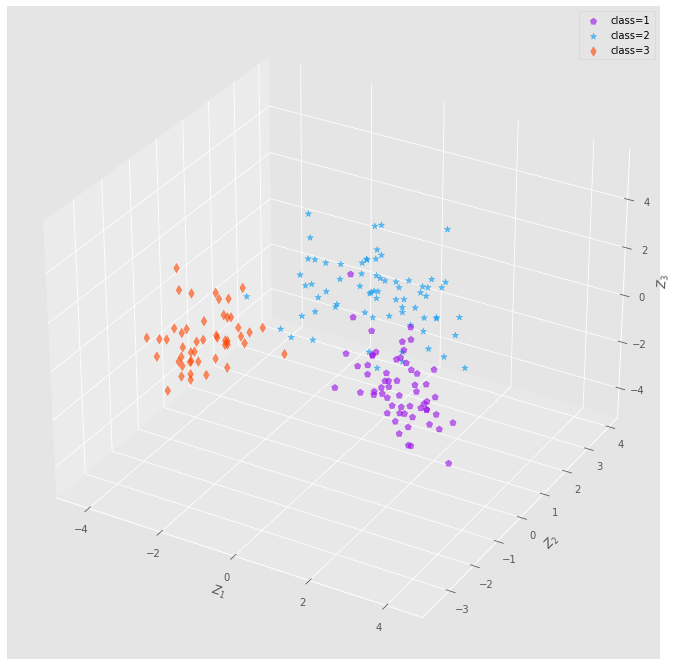

In [10]:
# 定義座標軸
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

pca_fit = PCA().fit_transform(ratings_[:, 0:13])
# 作圖
# colors = ['#069AF3', '#7FFFD4', '#FF4500']
colors = ['#9A0EEA', '#069AF3','#FF4500']
labels = data.iloc[:, -1].unique()
markers = ['p', '*', 'd']
for i, label in enumerate(labels):
    mask = data.iloc[:, -1] == label
    ax.scatter(pca_fit[mask, 0], pca_fit[mask, 1], pca_fit[mask, 2], alpha=0.6, label="class={}".format(
        i+1), color=colors[i], marker=markers[i], s=45)  # 生成散點.利用c控制顏色序列,s控制大小
ax.set_xlabel('$Z_1$')
ax.set_ylabel('$Z_2$')
ax.set_zlabel('$Z_3$')
ax.legend()
plt.show()


##### 方法二 #####

In [11]:
# 提取前三個主成分
pc1 = Z[0, :]
pc2 = Z[1, :]
pc3 = Z[2, :]

# 將每個點分配到不同的群組
c = pd.DataFrame({'x': pc1, 'y': pc2, 'z': pc3})
# 創建三維散點圖
fig = px.scatter_3d(c, x='x', y='y', z='z',
                    color=datanp[:, 13])  # , color='labels'
fig.update_traces(marker_size=4)
fig.update_coloraxes(showscale=False)
# 添加圖例和標籤
fig.update_layout(scene=dict(xaxis_title='Z_1', yaxis_title='Z_2', zaxis_title='Z_3'),
                  showlegend=True, autosize=False, width=700, height=700)
fig.update_scenes(xaxis_autorange="reversed")
fig.update_scenes(yaxis_autorange="reversed")
fig.show()


##### \<sol\>: 
- [圖三、考慮三個主成分的散布圖：角度 1](https://upload.cc/i1/2023/03/13/ilEweU.png)
- [圖四、考慮三個主成分的散布圖：角度 2](https://upload.cc/i1/2023/03/13/OvKPUl.png)

##### 當取三個主成分時，要呈現則需要在三度空間裡，如上圖，三維圖相比二維圖具有更好的群組分辨能力，因為在三維空間裡有更多的分群選擇，可以從更多角度來分群。

### 7.$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，如式 (10)，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。 ###


- ##### 首先選取每個變數跟反應變數（customer_segment)間的相關係數 #####

每個變數跟反應變數的相關係數
Alcohol                -0.328222
Malic_Acid              0.437776
Ash                    -0.049643
Ash_Alcanity            0.517859
Magnesium              -0.209179
Total_Phenols          -0.719163
Flavanoids             -0.847498
Nonflavanoid_Phenols    0.489109
Proanthocyanins        -0.499130
Color_Intensity         0.265668
Hue                    -0.617369
OD280                  -0.788230
Proline                -0.633717
Name: Customer_Segment, dtype: float64
correlation matrix


<AxesSubplot:>

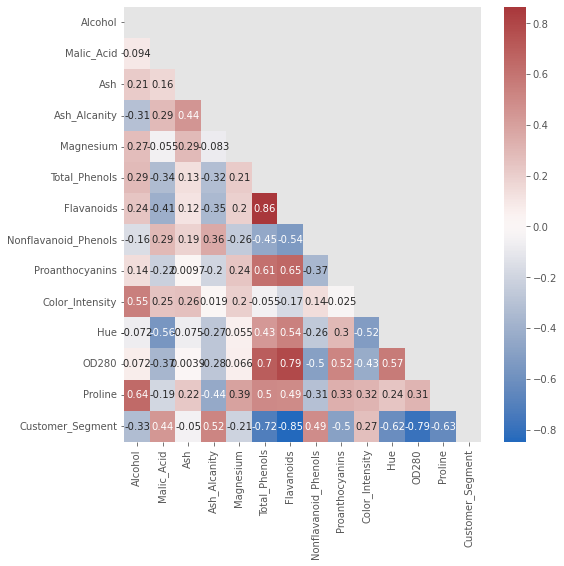

In [12]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(datanp)
# Apply transform to dataset.
ratings_ = scaler.transform(datanp)
df = pd.DataFrame(ratings_, columns=variables)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool))  # diagonal mask
# np.fliplr(R).diagonal()#反對角線元素的選取
print('每個變數跟反應變數的相關係數')
print(R.iloc[:, 13][0:13])
print('correlation matrix')
fig, ax = plt.subplots(figsize=(8, 8))
seaborn.heatmap(R, annot=True, mask=mask, cmap='vlag', ax=ax)


- ##### 再繪製兩個主成份和原變數對反應變數的相關係數這三條折線圖，其中係數都取絕對值，因為係數的正負值不影響它的重要性。 #####

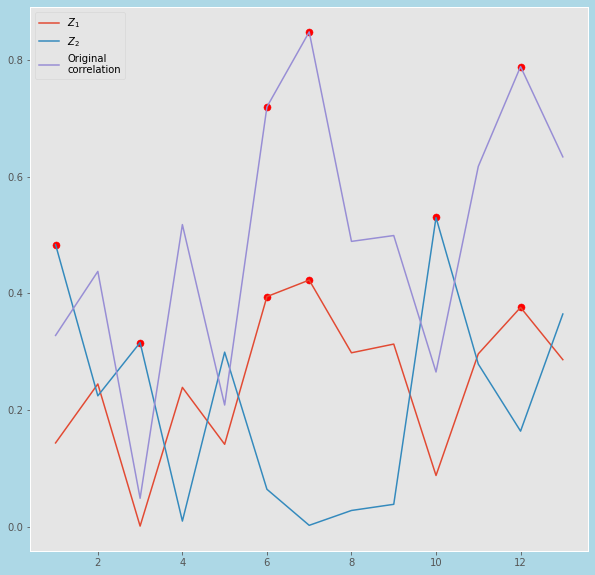

In [13]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(datanp)
# Apply transform to dataset.
ratings_ = scaler.transform(datanp)
Sx = np.cov(ratings_[:, 0:13].T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]  # 這個要問
eigvals = w[idx]
eigvecs = v[:, idx]
# print('$Z_1$ 的組成係數')
# print(eigvecs[:,0:1])
# print('$Z_2$ 的組成係數')
# print(eigvecs[:,1:2])
xticks = np.arange(1, 14)
plt.figure(figsize=(10, 10), facecolor='#ADD8E6')
plt.plot(xticks, abs(eigvecs[:, 0:1]), label='$Z_1$')
plt.plot(xticks, abs(eigvecs[:, 1:2]), label='$Z_2$')
plt.plot(xticks, abs(R.iloc[:, 13][0:13]), label='Original\ncorrelation')
plt.scatter([6, 7, 12], [abs(eigvecs[:, 0:1][5]), abs(
    eigvecs[:, 0:1][6]), abs(eigvecs[:, 0:1][11])], color='red', s=50)
plt.scatter([6, 7, 12], [abs(R.iloc[:, 13][0:13][5]), abs(
    R.iloc[:, 13][0:13][6]), abs(R.iloc[:, 13][0:13][11])], color='red', s=50)
plt.scatter([1, 3, 10], [abs(eigvecs[:, 1:2][0]), abs(
    eigvecs[:, 1:2][2]), abs(eigvecs[:, 1:2][9])], color='red', s=50)
# plt.title()
plt.grid()
plt.legend()


##### \<sol\> 可由上圖觀測出第一個主成分與原變數的相關係數的走勢一致，而第二個主成分則於前兩個相反。而第一個主成分與原變數相關係數前三重要的變數分別是，第六、七、十二個變數，而對應的變數名為Total_Phenols,Flavanoids,OD280;而第二個主成分前三重要的變數為第ㄧ、三、十，而對應的變數名稱為Alcohol,Ash,Color_Intensity。 #####

### 匯入資料二 ###

In [14]:
cancer = load_breast_cancer()
variables = cancer['feature_names']
print(len(variables))
# print(variables)
# variables=np.append(cancer['feature_names'], ['target'])
# df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],columns=variables )
df = pd.DataFrame(cancer['data'], columns=variables)
df.head(5)


30


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.繪製變數間的相關係數圖，以觀察變數間是否存在相關性，參考如圖一（或其他類似的圖）。  ###

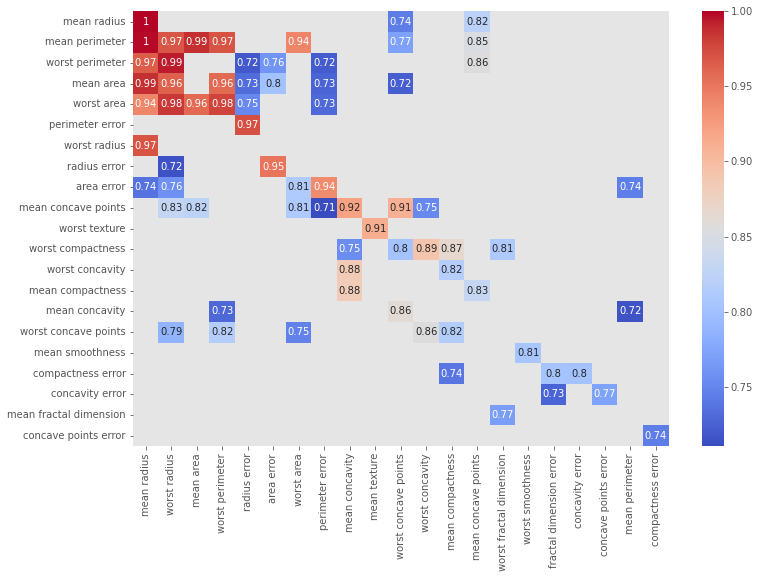

In [15]:
R = df.corr()
high_corr = R[abs(R) > 0.7]
mask = np.triu(np.ones_like(high_corr, dtype=bool))  # diagonal mask
high_corr = high_corr.unstack().sort_values(ascending=False).drop_duplicates()

fig, ax = plt.subplots(figsize=(12, 8))
# 繪製相關係數熱度圖
seaborn.heatmap(high_corr.unstack(), annot=True, cmap="coolwarm")
plt.show()
# mask = np.triu(np.ones_like(R, dtype=bool))  # diagonal mask
# fig, ax = plt.subplots(figsize=(15, 15))
# seaborn.heatmap(R, annot=True, mask=mask, cmap='vlag', ax=ax)


##### \<sol\> 判斷變數間是否有相關，可用變數間的相關係數來決定，一般來說相關係數介於0\~0.3間為低度相關，而介於0.3\~0.7為中度相關，相關係數介於0.7~1為高度相關。因為此題變數太多故只呈現相關係數大於0.7的部分。 ######

### 2.繪製一張含每個變數的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考，參考如圖二上排。 ###

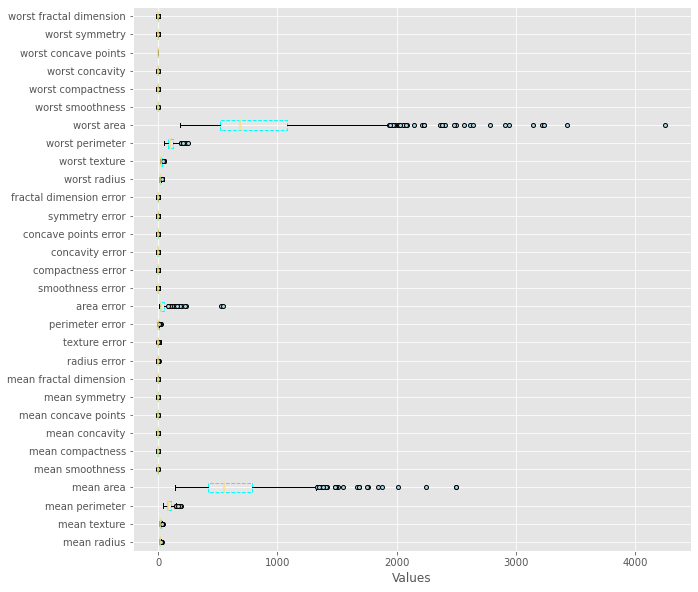

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
boxprops = dict(linestyle='--', linewidth=1, color='#00FFFF')
medianprops = dict(linestyle='-', linewidth=1.5, color='#FBDD7E')
flierprops = dict(marker='o', markerfacecolor='#ADD8E6',
                  markersize=4, linestyle='none')
ax.boxplot(df, boxprops=boxprops, flierprops=flierprops,medianprops=medianprops,
           labels=variables, vert=False)
ax.set_xlabel('Values')
plt.show()


##### \<sol\> 由上圖Boxplot可觀測出，變數worst area跟mean area與其他變數的單位差距很大，故此筆資料建議做標準化。 #####

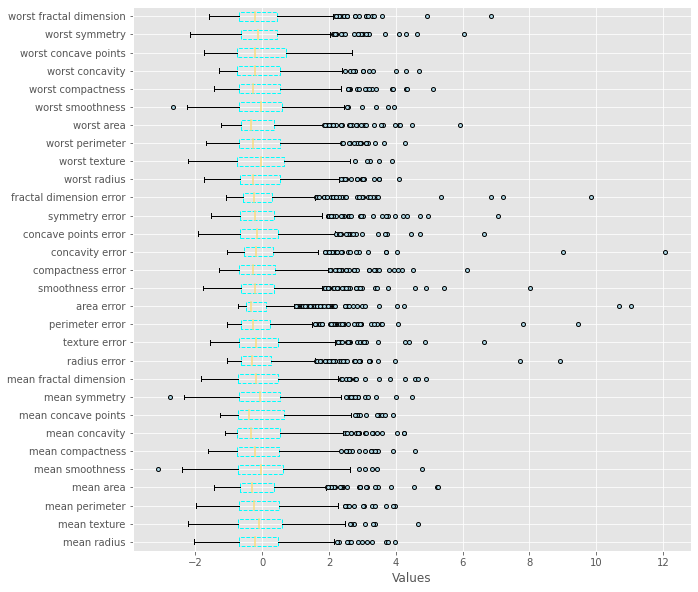

In [17]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(df)
# Apply transform to dataset.
ratings_ = scaler.transform(df)

fig, ax = plt.subplots(figsize=(10, 10))
medianprops = dict(linestyle='-', linewidth=1.5, color='#FBDD7E')
boxprops = dict(linestyle='--', linewidth=1, color='#00FFFF')
flierprops = dict(marker='o', markerfacecolor='#ADD8E6',
                  markersize=4, linestyle='none')
ax.boxplot(ratings_, boxprops=boxprops, flierprops=flierprops,medianprops=medianprops,
           labels=variables, vert=False)
ax.set_xlabel('Values')
plt.show()


##### \<sol\> 此圖為標準化完的結果，可觀測出每個變數的離散程度相近。 #####

### 3.進行主成分分析，繪製特徵值由大而小的分布與 scree plot。參考如圖二中排。 ###

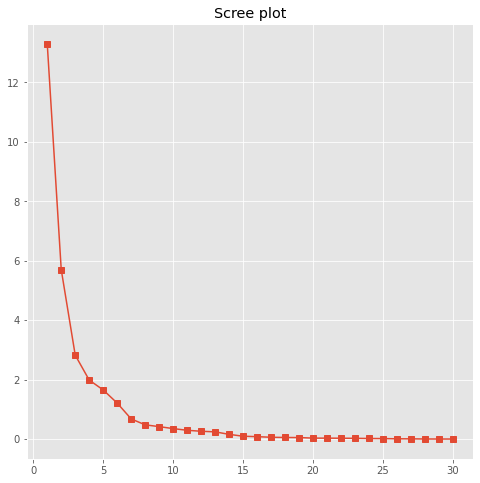

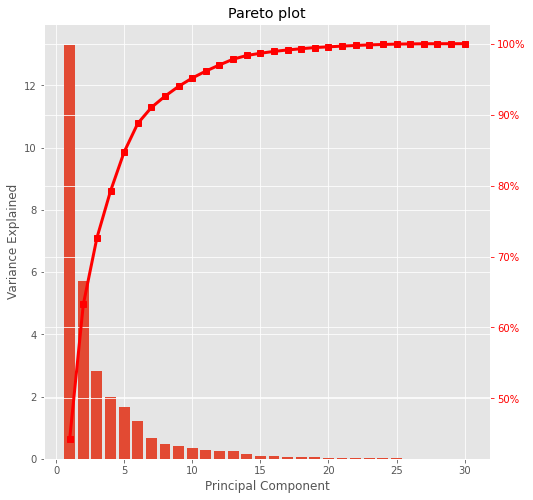

In [18]:
s_x_npfun = np.cov(ratings_.T, bias=False)
w, v = eig(s_x_npfun)
idx = np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T


plt.figure(figsize=(8, 8))
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker='s')
plt.title('Scree plot')
plt.grid(True)
plt.show()
fig, ax = plt.subplots(figsize=(8, 8))
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax2 = ax.twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100,
         marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
ax.set_title('Pareto plot')
plt.show()


##### \<sol\> 由scree plot 中可觀測，在第三個主成分時有個明顯的彎曲點(elbow)，表示前面三個主成分已經足夠表達原變數的變異含量，則建議新變數取三個主成分即可;而從pareto plot 近一步可觀測出，當選取三個主成分時，這三個主成分已經達到原變數的變異含量的70\%以上，故只取三個主成分可達到維度的縮減(dimension reduction)。 ######

### 4.資料中的每位病患都有標籤（label），代表是否有惡性腫瘤。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。如圖二下排左。是否可以從兩個主成分的散布圖中看出兩個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。 ###

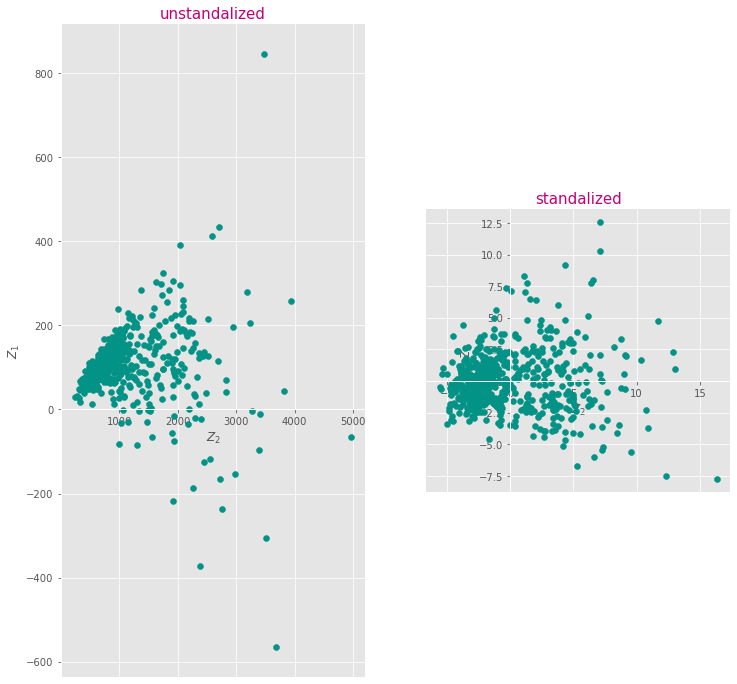

In [19]:
# 未標準化的
Sx = np.cov(df.T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]  # 這個要問
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ df.T  # dataframe
fig, ax = plt.subplots(1, 2, figsize=(12, 12), squeeze=False)
ax[0][0].scatter(Z.loc[0, :], Z.loc[1, :],color='#029386')
ax[0][0].set_ylabel('$Z_1$')
ax[0][0].set_xlabel('$Z_2$')
ax[0][0].set_title('unstandalized', c='#C20078',size=15)
ax[0][0].spines['left'].set_position(('data', 0))
ax[0][0].spines['bottom'].set_position(('data', 0))
ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)  # 可觀察出z1的能量大於z2
# 標準化的
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(df)
# Apply transform to dataset.
ratings_ = scaler.transform(df)
Sx = np.cov(ratings_.T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]  # 這個要問
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings_.T
ax[0][1].scatter(Z[0, :], Z[1, :],c='#029386')
ax[0][1].set_aspect(1)
ax[0][1].set_title('standalized', c='#C20078',size=15)
ax[0][1].set_ylabel('$Z_1$')
ax[0][1].set_xlabel('$Z_2$')
ax[0][1].spines['left'].set_position(('data', 0))
ax[0][1].spines['bottom'].set_position(('data', 0))
ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)  # 可觀察出z1的能量大於z2
# ax[0][1].invert_yaxis()
plt.show()


##### \<sol\> 左圖為尚未經過標準化的前兩項主成分的離散圖，右圖則為經過標準化的，可看出還沒經過標準化時離散程度非常大，而從這兩張離散圖都不太能看出是否有惡性腫瘤。 #####

### 5.再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色，如圖二下排右。 ###

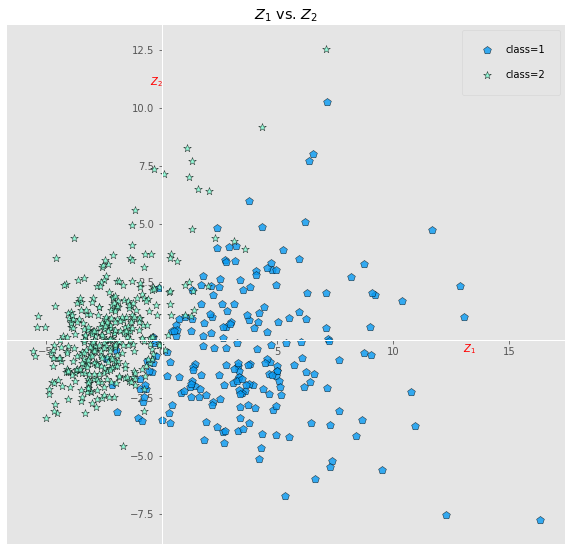

In [20]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(df)
# Apply transform to dataset.
ratings_ = scaler.transform(df)
Sx = np.cov(ratings_.T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]  # 這個要問
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings_.T
pca_fit = PCA().fit_transform(ratings_)  # 用ratings_[:,0:13]来训练PCA模型，同时返回降维后的数据
fig, ax = plt.subplots(1, figsize=(10, 10), squeeze=False)
# colors = ['#069AF3', '#7FFFD4', '#FF4500']
colors = ['#069AF3', '#7FFFD4']
labels = pd.Series(cancer['target']).unique()
markers = ['p', '*']
for i, label in enumerate(labels):
    mask = pd.Series(cancer['target']) == label  # 這裡畫圖用到條件式的判斷，比如下面的條件式判斷範例
    ax[0][0].scatter(pca_fit[mask, 0], pca_fit[mask, 1], c=colors[i], label="class={}".format(
        i+1), alpha=0.8, edgecolors='black', marker=markers[i], s=65)
    ax[0][0].set_aspect(1)
    ax[0][0].spines['left'].set_position(('data', 0))
    ax[0][0].spines['bottom'].set_position(('data', 0))
    ax[0][0].spines['top'].set_visible(False)
    ax[0][0].spines['right'].set_visible(False)  # 可觀察出z1的能量大於z2
    ax[0][0].legend(borderpad=1.5, labelspacing=1.5)
ax[0][0].grid()
ax[0][0].text(13, -0.5, '$Z_1$', color='r')
ax[0][0].text(-0.5, 11, '$Z_2$', color='r')
plt.title('$Z_1$ vs. $Z_2$')
plt.show()


### 6.如果採三個主成分，則可繪製如圖三與圖四的立體圖。觀察圖三、四是否比圖二具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。 ###

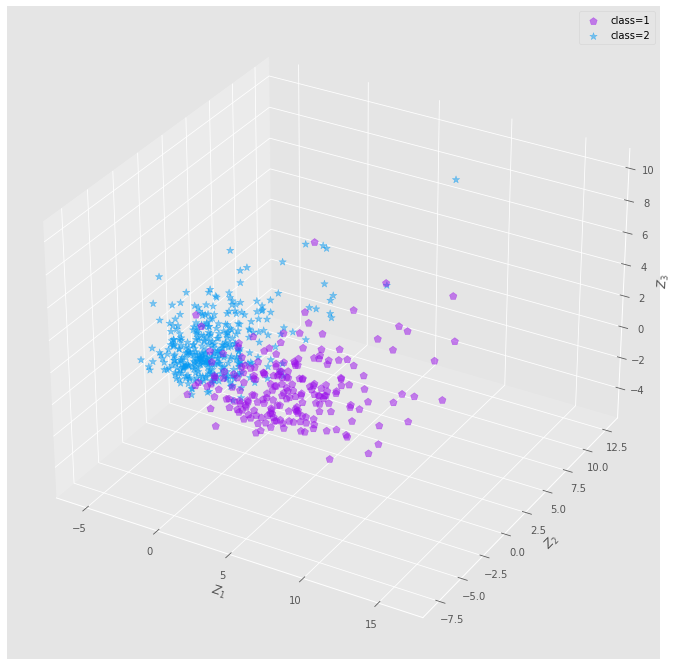

In [21]:
# 定義座標軸
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection='3d')

pca_fit = PCA().fit_transform(ratings_)
# 作圖
colors = ['#9A0EEA', '#069AF3']
labels = pd.Series(cancer['target']).unique()
markers = ['p', '*']
for i, label in enumerate(labels):
    mask = pd.Series(cancer['target']) == label
    ax.scatter(pca_fit[mask, 0], pca_fit[mask, 1], pca_fit[mask, 2], alpha=0.5, label="class={}".format(
        i+1), color=colors[i], marker=markers[i], s=60)  # 生成散點.利用c控制顏色序列,s控制大小
ax.set_xlabel('$Z_1$')
ax.set_ylabel('$Z_2$')
ax.set_zlabel('$Z_3$')
ax.legend()
plt.show()


In [22]:
# 提取前三個主成分
pc1 = Z[0, :]
pc2 = Z[1, :]
pc3 = Z[2, :]

# 將每個點分配到不同的群組
c = pd.DataFrame({'x': pc1, 'y': pc2, 'z': pc3})
# 創建三維散點圖
fig = px.scatter_3d(c, x='x', y='y', z='z',
                    color=cancer['target'])  # , color='labels'
fig.update_traces(marker_size=4)
fig.update_coloraxes(showscale=False)
# 添加圖例和標籤
fig.update_layout(scene=dict(xaxis_title='Z_1', yaxis_title='Z_2', zaxis_title='Z_3'),
                  showlegend=True, autosize=False, width=700, height=700)
fig.update_scenes(xaxis_autorange="reversed")
fig.update_scenes(yaxis_autorange="reversed")
fig.show()


##### \<sol\>: 
- [圖三、考慮三個主成分的散布圖：角度 1](https://upload.cc/i1/2023/03/14/2UYGk5.png)
- [圖四、考慮三個主成分的散布圖：角度 2](https://upload.cc/i1/2023/03/14/nTpNgY.png)

##### 當取三個主成分時，要呈現則需要在三度空間裡，如上圖，三維圖相比二維圖具有更好的群組分辨能力，因為在三維空間裡有更多的分群選擇，可以從更多角度來分群。而繪製圖三、圖四這兩圖則需要在.py檔裡面執行，因為.py檔可支援將三維圖坐旋轉。

### 7.$Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，如式 (10)，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。 ###


- ##### 首先選取每個變數跟反應變數（customer_segment)間的相關係數 #####

每個變數跟反應變數的相關係數
mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave

<AxesSubplot:>

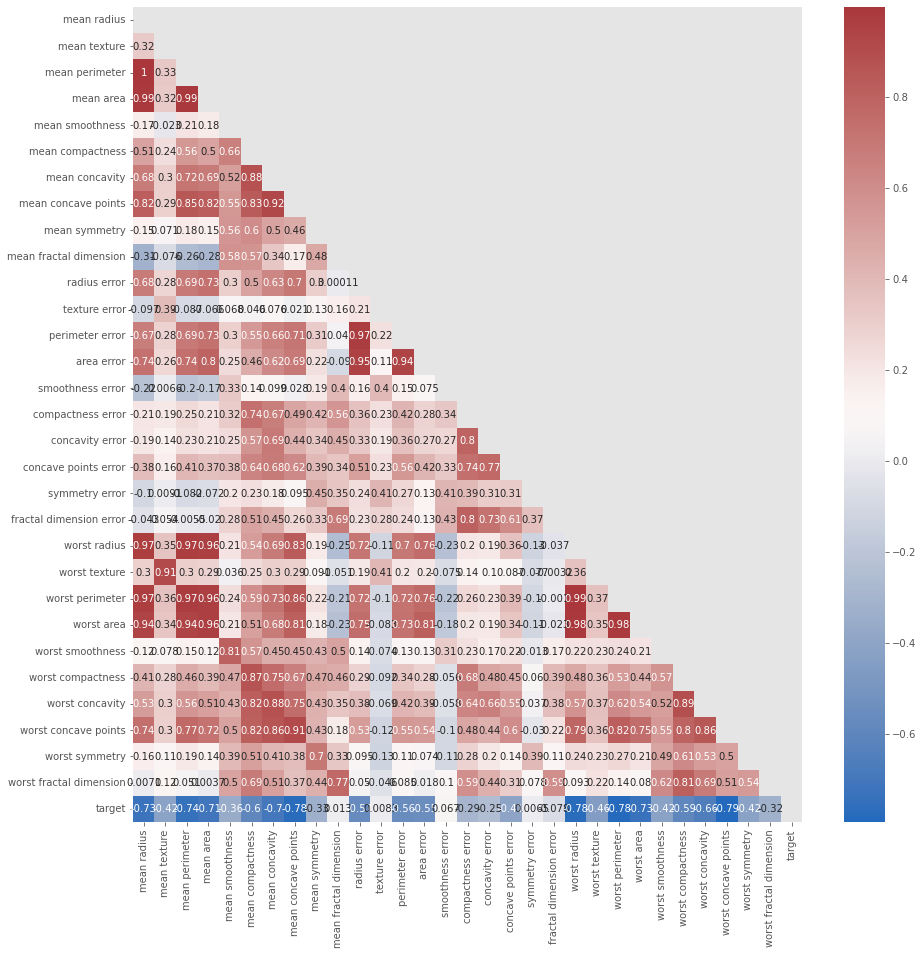

In [23]:
cancer = load_breast_cancer()
variables = np.append(cancer['feature_names'], ['target'])
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns=variables)
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(df)
# Apply transform to dataset.
ratings_ = scaler.transform(df)
df = pd.DataFrame(ratings_, columns=variables)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool))  # diagonal mask
print('每個變數跟反應變數的相關係數')
print(R.iloc[:, 30][0:30])
print('correlation matrix')
fig, ax = plt.subplots(figsize=(15, 15))
seaborn.heatmap(R, annot=True, mask=mask, cmap='vlag', ax=ax)


- ##### 再繪製兩個主成份和原變數對反應變數的相關係數這三條折線圖，其中係數都取絕對值，因為係數的正負值不影響它的重要性。 #####

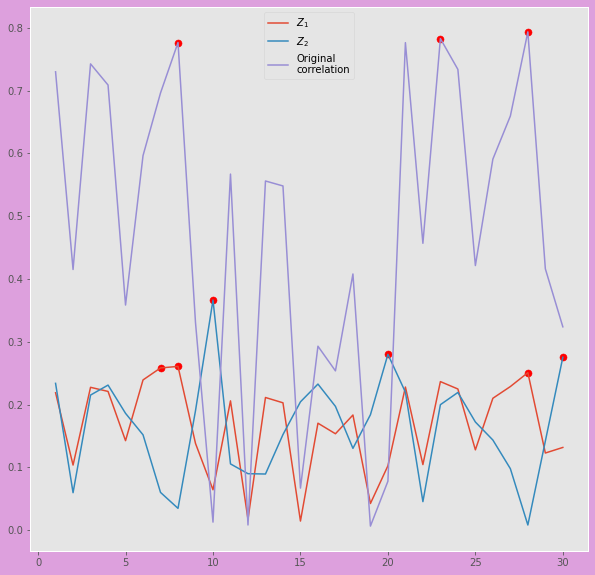

In [24]:
cancer = load_breast_cancer()
variables = cancer['feature_names']
# variables=np.append(cancer['feature_names'], ['target'])
# df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],columns=variables )
df = pd.DataFrame(cancer['data'], columns=variables)
# Compute the mean and std to be used for later scaling.
scaler.fit(df)
# Apply transform to dataset.
ratings_ = scaler.transform(df)
Sx = np.cov(ratings_.T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]  # 這個要問
eigvals = w[idx]
eigvecs = v[:, idx]
# print('$Z_1$ 的組成係數')
# print(eigvecs[:,0:1])
# print('$Z_2$ 的組成係數')
# print(eigvecs[:,1:2])
xticks = np.arange(1, 31)
plt.figure(figsize=(10, 10), facecolor='#DDA0DD')
plt.plot(xticks, abs(eigvecs[:, 0:1]), label='$Z_1$')
plt.plot(xticks, abs(eigvecs[:, 1:2]), label='$Z_2$')
plt.plot(xticks, abs(R.iloc[:, 30][0:30]), label='Original\ncorrelation')
plt.scatter([7, 8, 28], [abs(eigvecs[:, 0:1][6]), abs(
    eigvecs[:, 0:1][7]), abs(eigvecs[:, 0:1][27])], color='red', s=50)
plt.scatter([8, 23, 28], [abs(R.iloc[:, 30][0:30][7]), abs(
    R.iloc[:, 30][0:30][22]), abs(R.iloc[:, 30][0:30][27])], color='red', s=50)
plt.scatter([10, 20, 30], [abs(eigvecs[:, 1:2][9]), abs(
    eigvecs[:, 1:2][19]), abs(eigvecs[:, 1:2][29])], color='red', s=50)
plt.grid()
plt.legend()


##### \<sol\> 可由上圖觀測出第一個主成分與原變數的相關係數的走勢大致一致，而第二個主成分則於前兩個不盡相同。而原變數相關係數前三重要的變數分別是，第7、23、28個變數，而對應的變數名為mean concavity,worst perimeter,worst concave points;而第一個主成分前三重要的變數分別是，第7、8、28個變數，而對應的變數名為mean concavity,mean concave points,worst concave points;而第二個主成分前三重要的變數為第10、20、30個變數，而對應的變數名稱為mean fractal dimension,fractal dimension error,worst fractal dimension。 #####

In [25]:
variables  # 全部的變數名稱


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')